In [25]:
pip install ucimlrepo

In [26]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets
X["death_event"] = y
df = X
# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)


{'uci_id': 519, 'name': 'Heart failure clinical records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'title': 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejec

In [27]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [28]:
pip install pycaret

In [29]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(df, verbose=False)
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5535,499.6078,0.5707,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,Cluster
0,75.0,0,582,0,20,1,265000.00000,1.9,130,1,0,4,1,Cluster 0
1,55.0,0,7861,0,38,0,263358.03125,1.1,136,1,0,6,1,Cluster 0
2,65.0,0,146,0,20,0,162000.00000,1.3,129,1,1,7,1,Cluster 2
3,50.0,1,111,0,20,0,210000.00000,1.9,137,1,0,7,1,Cluster 0
4,65.0,1,160,1,20,0,327000.00000,2.7,116,0,0,8,1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00000,1.1,143,1,1,270,0,Cluster 2
295,55.0,0,1820,0,38,0,270000.00000,1.2,139,0,0,271,0,Cluster 0
296,45.0,0,2060,1,60,0,742000.00000,0.8,138,0,0,278,0,Cluster 3
297,45.0,0,2413,0,38,0,140000.00000,1.4,140,1,1,280,0,Cluster 2


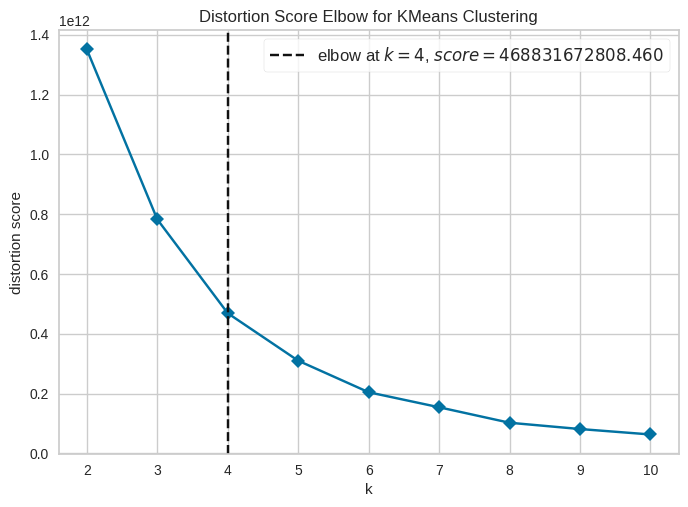

In [30]:
plot_model(KMeanClusteringModel, plot = 'elbow')

In [31]:
setup(data = df, verbose=False)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 8")
x = create_model('kmeans', num_clusters = 8)

print("For Cluster = 15")
x = create_model('kmeans', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5532,499.8170,0.5760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5944,1113.3089,0.4300,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5711,2056.3217,0.3927,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0907,28.9092,2.3811,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

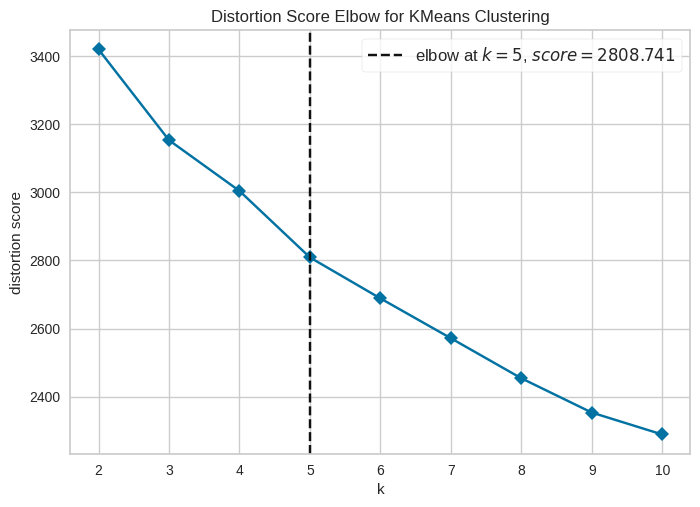

In [32]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [33]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 8")
x = create_model('kmeans', num_clusters = 8)

print("For Cluster = 15")
x = create_model('kmeans', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1138,29.8268,2.0320,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1082,24.0526,1.9797,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1107,18.3631,1.9031,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5649,616.8892,0.5138,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

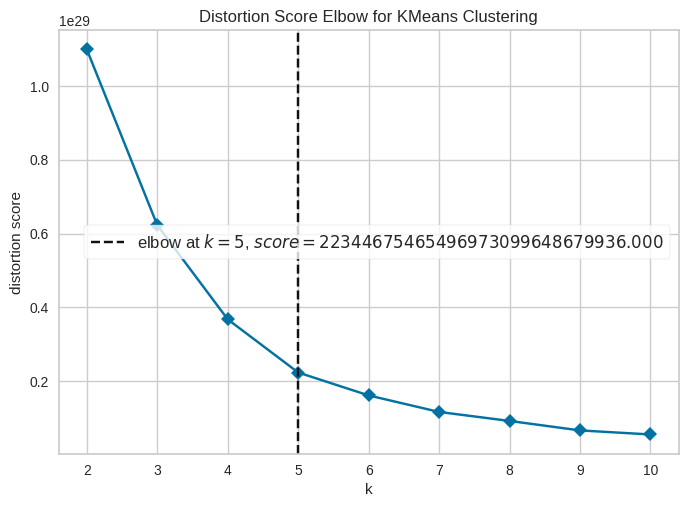

In [34]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [35]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 8")
x = create_model('kmeans', num_clusters = 8)

print("For Cluster = 15")
x = create_model('kmeans', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5710,624.5236,0.5106,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6337,1162.2549,0.4604,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9011,3292.3760,0.2576,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5535,499.6078,0.5707,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

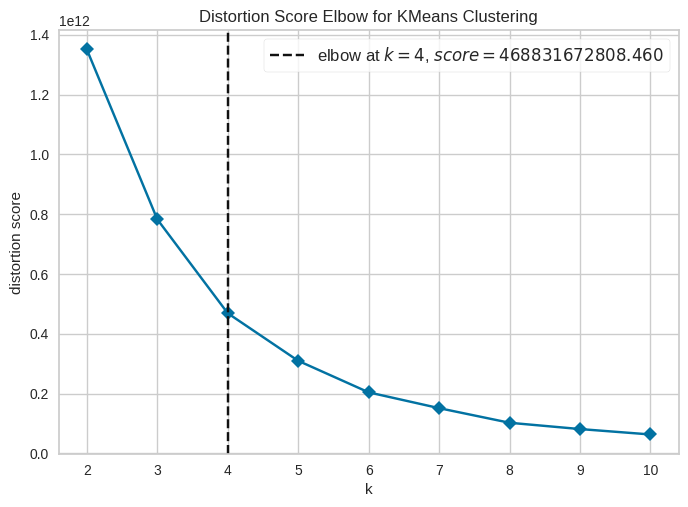

In [36]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [37]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 8")
x = create_model('kmeans', num_clusters = 8)

print("For Cluster = 15")
x = create_model('kmeans', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5545,499.4446,0.5698,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5944,1113.3089,0.4300,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5764,1984.9257,0.3769,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0962,30.8122,2.4544,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

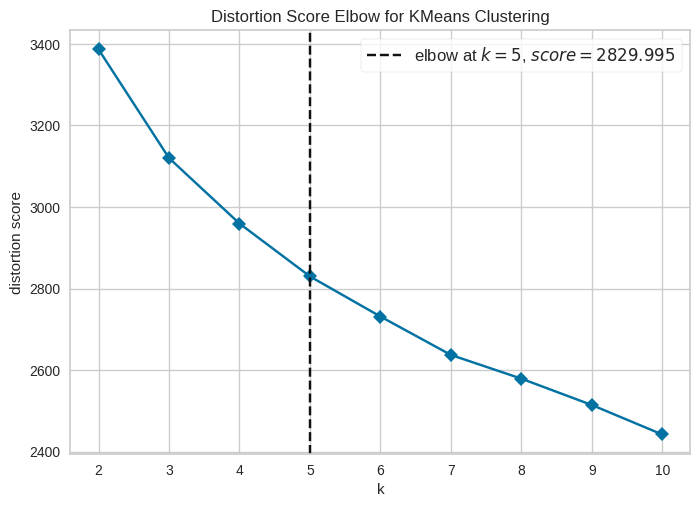

In [38]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [39]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 8")
x = create_model('kmeans', num_clusters = 8)

print("For Cluster = 15")
x = create_model('kmeans', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0958,30.9421,2.4128,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0927,20.9920,2.4064,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0983,15.5236,2.0453,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0957,30.9490,2.4818,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

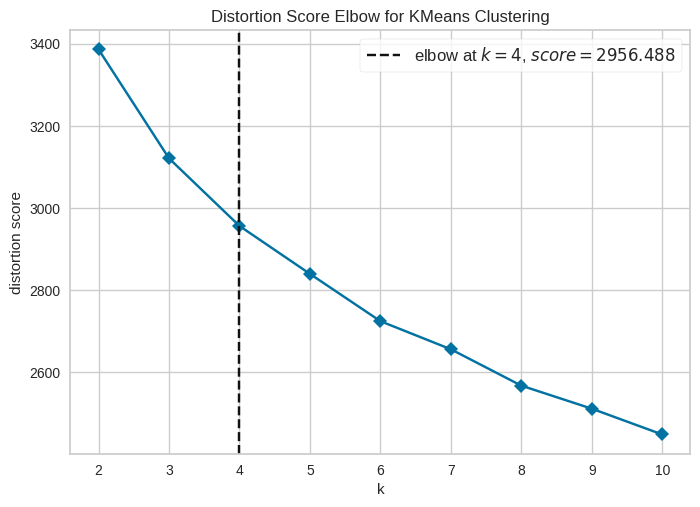

In [40]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [41]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 8")
x = create_model('kmeans', num_clusters = 8)

print("For Cluster = 15")
x = create_model('kmeans', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0970,30.9411,2.4531,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0903,21.0304,2.3839,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0959,15.5468,2.0452,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Agglomoretive (Heirarichal) Clustering.

In [42]:
setup(data = df, verbose=False)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 8")
x = create_model('hclust', num_clusters = 8)

print("For Cluster = 15")
x = create_model('hclust', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5395,478.6348,0.5775,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5591,983.6608,0.4512,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5525,1907.2675,0.3936,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [43]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 8")
x = create_model('hclust', num_clusters = 8)

print("For Cluster = 15")
x = create_model('hclust', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0850,25.3112,2.1641,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0842,20.6119,2.0780,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0986,17.1147,1.9392,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [44]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 8")
x = create_model('hclust', num_clusters = 8)

print("For Cluster = 15")
x = create_model('hclust', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5408,497.6851,0.5251,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6302,1077.0335,0.4829,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8247,2992.0209,0.3643,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [45]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 8")
x = create_model('hclust', num_clusters = 8)

print("For Cluster = 15")
x = create_model('hclust', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5395,478.6348,0.5775,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5591,983.6608,0.4512,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5525,1907.2675,0.3936,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [46]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 8")
x = create_model('hclust', num_clusters = 8)

print("For Cluster = 15")
x = create_model('hclust', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0587,23.6416,2.6958,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0593,17.7228,2.4838,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0815,14.2167,2.1044,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [47]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 8")
x = create_model('hclust', num_clusters = 8)

print("For Cluster = 15")
x = create_model('hclust', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0587,23.6416,2.6958,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0593,17.7228,2.4838,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0815,14.2167,2.1044,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Affinity Propagation Clustering

In [61]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 4")
x = create_model('ap', num_clusters = 4)

print("For Cluster = 8")
x = create_model('ap', num_clusters = 8)

print("For Cluster = 15")
x = create_model('ap', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0917,10.4817,1.7312,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0917,10.4817,1.7312,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0917,10.4817,1.7312,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [62]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 4")
x = create_model('ap', num_clusters = 4)

print("For Cluster = 8")
x = create_model('ap', num_clusters = 8)

print("For Cluster = 15")
x = create_model('ap', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0917,10.4817,1.7312,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0917,10.4817,1.7312,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0917,10.4817,1.7312,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [63]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 4")
x = create_model('ap', num_clusters = 4)

print("For Cluster = 8")
x = create_model('ap', num_clusters = 8)

print("For Cluster = 15")
x = create_model('ap', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1702,124.3669,0.3548,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1702,124.3669,0.3548,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1702,124.3669,0.3548,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [64]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 4")
x = create_model('ap', num_clusters = 4)

print("For Cluster = 8")
x = create_model('ap', num_clusters = 8)

print("For Cluster = 15")
x = create_model('ap', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0341,184.9633,0.7716,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0341,184.9633,0.7716,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0341,184.9633,0.7716,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [65]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 4")
x = create_model('ap', num_clusters = 4)

print("For Cluster = 8")
x = create_model('ap', num_clusters = 8)

print("For Cluster = 15")
x = create_model('ap', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1137,12.3335,1.4851,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1137,12.3335,1.4851,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1137,12.3335,1.4851,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [66]:
setup(data = df, verbose=False)

print("For Cluster = 4")
x = create_model('ap', num_clusters = 4)

print("For Cluster = 8")
x = create_model('ap', num_clusters = 8)

print("For Cluster = 15")
x = create_model('ap', num_clusters = 15)

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2268,237.2637,0.2530,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 8


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2268,237.2637,0.2530,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 15


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2268,237.2637,0.2530,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]